<a href="https://colab.research.google.com/github/sowmya525/ipl-analysis/blob/main/IPL_Prediction_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL 1st Inning Score Prediction using Machine Learning
The Dataset contains ball by ball information of the matches played between IPL Teams of **Season 1 to 10**, i.e. from 2008 to 2017.<br/>
This Machine Learning model adapts a Regression Appoach to predict the score of the First Inning of an IPL Match.<br/>
The Dataset can be downloaded from Kaggle from [here](https://www.kaggle.com/yuvrajdagur/ipl-dataset-season-2008-to-2017).<br/>

# Import Necessary Libraries
and Mounting GDrive for importing Dataset

In [ ]:
import pandas as pd
import numpy as np
np.__version__

'2.0.2'

Mount your Google Drive and save the dataset in the Drive name "data.csv"

In [ ]:
# Mounting GDrive and importing dataset
data = pd.read_csv('/content/drive/My Drive/ipl_colab.csv')
print(f"Dataset successfully Imported of Shape : {data.shape}")

Dataset successfully Imported of Shape : (76014, 15)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

In [ ]:
# First 5 Columns Data
data.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
# Describing Numerical Values of the Dataset
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [ ]:
# Information (not-null count and data type) About Each Column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [ ]:
# Number of Unique Values in each column
data.nunique()

,0
mid,617
date,442
venue,35
batting_team,14
bowling_team,14
batsman,411
bowler,329
runs,252
wickets,11
overs,140


In [ ]:
# Datatypes of all Columns
data.dtypes

,0
mid,int64
date,object
venue,object
batting_team,object
bowling_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


# Data Cleaning

#### Removing Irrelevant Data colunms

In [ ]:
# Names of all columns
data.columns

Index(['mid', 'date', 'venue', 'batting_team', 'bowling_team', 'batsman',
       'bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total'],
      dtype='object')

Here, we can see that columns _['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']_ won't provide any relevant information for our model to train

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/ipl_colab.csv')
print(f"Dataset successfully Imported of Shape : {data.shape}")
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {data.shape}')
data = data.drop(irrelevant, axis=1)
print(f'After Removing Irrelevant Columns : {data.shape}')
data.head()

Dataset successfully Imported of Shape : (76014, 15)
Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Keeping only Consistent Teams
(teams that never change even in current season)

In [ ]:
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
print(f'Before Removing Inconsistent Teams : {data.shape}')
data = data[(data['batting_team'].isin(const_teams)) & (data['bowling_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {data.shape}')
print(f"Consistent Teams : \n{data['batting_team'].unique()}")
data.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


#### Remove First 5 Overs of every match

In [ ]:
print(f'Before Removing Overs : {data.shape}')
data = data[data['overs'] >= 5.0]
print(f'After Removing Overs : {data.shape}')
data.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


Plotting a Correlation Matrix of current data

<Axes: >

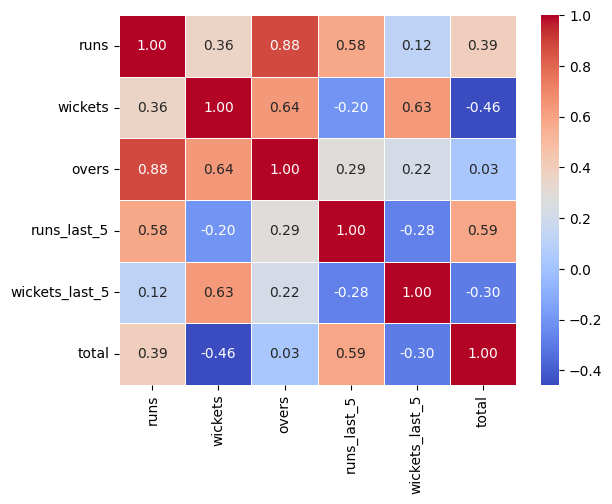

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(data=numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Data Preprocessing and Encoding

#### Performing Label Encoding

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load data
data = pd.read_csv('/content/drive/My Drive/ipl_colab.csv')


#### Performing One Hot Encoding and Column Transformation

In [ ]:
categorical_cols = ['batting_team', 'bowling_team']

# Column transformer with updated OneHotEncoder syntax
columnTransformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns
)


In [ ]:
transformed_data = columnTransformer.fit_transform(data)
encoded_feature_names = columnTransformer.get_feature_names_out()
df = pd.DataFrame(transformed_data, columns=encoded_feature_names)
print(df.head())


  encoder__batting_team_Chennai Super Kings  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

  encoder__batting_team_Deccan Chargers  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

  encoder__batting_team_Delhi Daredevils encoder__batting_team_Gujarat Lions  \
0                                    0.0                                 0.0   
1                                    0.0                                 0.0   
2                                    0.0                                 0.0   
3                                    0.0                                 0.0   
4                                    0.0                  

Save the Numpy Array in a new DataFrame with transformed columns

In [ ]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(data, columns=cols)

In [ ]:
# Visualize Encoded Data
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0.1,1,0,222
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0.2,1,0,222
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,0,0.2,2,0,222
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,0,0.3,2,0,222
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,0,0.4,2,0,222


# Model Building

## Prepare Train and Test Splits

In [ ]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [ ]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (60811, 21)
Testing Set : (15203, 21)


## Model Algorithms
Training and Testing on different Machine Learning Algorithms for the best algorithm to choose from

In [ ]:
# Keeping track of model perfomances
models = dict()

#### 1. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [ ]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 80.58%
Test Score : 39.29%


In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 14.67574052130291
Mean Squared Error (MSE): 513.4367955149742
Root Mean Squared Error (RMSE): 22.659143750701926


#### Linear Regression

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(train_features, train_labels)  # No need to drop/fill NaNs


HistGradientBoostingRegressor()

In [ ]:
train_score = model.score(train_features, train_labels) * 100
test_score = model.score(test_features, test_labels) * 100

print(f"Train Score : {train_score:.2f}%")
print(f"Test Score  : {test_score:.2f}%")


Train Score : 56.17%
Test Score  : 53.82%


In [ ]:
models["HistGradientBoosting"] = f"{test_score:.2f}"

# Metrics
print("---- HistGradientBoostingRegressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {:.2f}".format(mae(test_labels, model.predict(test_features))))
print("Mean Squared Error (MSE): {:.2f}".format(mse(test_labels, model.predict(test_features))))
print("Root Mean Squared Error (RMSE): {:.2f}".format(np.sqrt(mse(test_labels, model.predict(test_features)))))

---- HistGradientBoostingRegressor - Model Evaluation ----
Mean Absolute Error (MAE): 14.27
Mean Squared Error (MSE): 390.58
Root Mean Squared Error (RMSE): 19.76


#### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [ ]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 77.99%
Test Score : 54.86%


In [ ]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.414190853808748
Mean Squared Error (MSE): 381.75905383103964
Root Mean Squared Error (RMSE): 19.538655374181705


#### Lasso Regression

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
train_features = train_features.dropna(axis=1, how='all')
test_features = test_features.dropna(axis=1, how='all')
common_cols = train_features.columns.intersection(test_features.columns)
train_features = train_features[common_cols]
test_features = test_features[common_cols]
imputer = SimpleImputer(strategy='mean')
train_imputed = imputer.fit_transform(train_features)
test_imputed = imputer.transform(test_features)


In [ ]:
# Train LassoCV
lasso = LassoCV()
lasso.fit(train_imputed, train_labels)

# Evaluate Model
train_score_lasso = str(lasso.score(train_imputed, train_labels)*100)
test_score_lasso = str(lasso.score(test_imputed, test_labels)*100)

print(f'Train Score : {train_score_lasso[:5]}%')
print(f'Test Score  : {test_score_lasso[:5]}%')



Train Score : 50.76%
Test Score  : 50.50%


In [ ]:
print("-- Lasso Regression - Model Evaluation --")
print("Mean Absolute Error (MAE): {:.2f}".format(mae(test_labels, lasso.predict(test_imputed))))
print("Mean Squared Error (MSE): {:.2f}".format(mse(test_labels, lasso.predict(test_imputed))))
print("Root Mean Squared Error (RMSE): {:.2f}".format(np.sqrt(mse(test_labels, lasso.predict(test_imputed)))))

-- Lasso Regression - Model Evaluation --
Mean Absolute Error (MAE): 15.09
Mean Squared Error (MSE): 418.58
Root Mean Squared Error (RMSE): 20.46


#### Support Vector Machine

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
import numpy as np
df = pd.read_csv('/content/drive/My Drive/ipl_colab.csv')
irrelevant = ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df = df.drop(irrelevant, axis=1)
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['batting_team'].isin(const_teams)) & (df['bowling_team'].isin(const_teams))]
df = df[df['overs'] >= 5.0]
df = pd.get_dummies(df, columns=['batting_team', 'bowling_team'])
X = df.drop('total', axis=1)
y = df['total']
train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42
)
imputer = SimpleImputer(strategy='constant', fill_value=0)
train_imputed = imputer.fit_transform(train_features)
test_imputed = imputer.transform(test_features)
svm = SVR()
svm.fit(train_imputed, train_labels)
train_score_svm = str(svm.score(train_imputed, train_labels) * 100)
test_score_svm = str(svm.score(test_imputed, test_labels) * 100)
print(f'Train Score : {train_score_svm[:5]}%')
print(f'Test Score  : {test_score_svm[:5]}%')
models = {}
models["svm"] = test_score_svm
predictions = svm.predict(test_imputed)
print("---- SVR Evaluation ----")
print("MAE: {:.2f}".format(mae(test_labels, predictions)))
print("MSE: {:.2f}".format(mse(test_labels, predictions)))
print("Root Mean Squared Error (RMSE): {:.2f}".format(np.sqrt(mse(test_labels, predictions))))

Train Score : 57.17%
Test Score  : 58.25%
---- SVR Evaluation ----
MAE: 14.61
MSE: 373.13
Root Mean Squared Error (RMSE): 19.32


#### Neural Networks

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_features)
test_scaled = scaler.transform(test_features)

neural_net = MLPRegressor(activation='relu', max_iter=1500, random_state=42)
neural_net.fit(train_scaled, train_labels)


MLPRegressor(max_iter=1500, random_state=42)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_imputed)
test_scaled = scaler.transform(test_imputed)
neural_net = MLPRegressor(activation='relu', max_iter=1500, random_state=42)
neural_net.fit(train_scaled, train_labels)
train_score_neural_net = neural_net.score(train_scaled, train_labels) * 100
test_score_neural_net = neural_net.score(test_scaled, test_labels) * 100
print(f"Train Score : {train_score_neural_net:.2f}%")
print(f"Test Score  : {test_score_neural_net:.2f}%")
print("\n--- Neural Network - Model Evaluation ---")
print(f"MAE  : {mae(test_labels, neural_net.predict(test_scaled)):.2f}")
print(f"MSE  : {mse(test_labels, neural_net.predict(test_scaled)):.2f}")
print(f"RMSE : {np.sqrt(mse(test_labels, neural_net.predict(test_scaled))):.2f}")


Train Score : 86.47%
Test Score  : 85.15%

--- Neural Network - Model Evaluation ---
MAE  : 8.33
MSE  : 132.72
RMSE : 11.52


## Best Model Selection

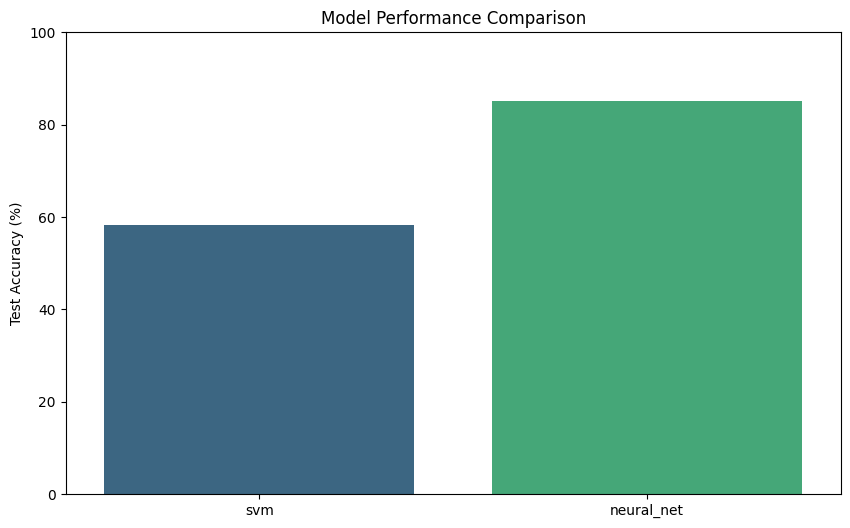

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import barplot

# Initialize the models dictionary (or clear it if it exists)
models = {}
models["svm"] = test_score_svm
models["neural_net"] = test_score_neural_net


model_names = list(models.keys())
accuracy = list(map(float, models.values()))

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy, hue=model_names, palette='viridis', legend=False)
plt.ylabel("Test Accuracy (%)")
plt.title("Model Performance Comparison")
plt.ylim(0, 100)
plt.show()

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **Neural Networks**. So we will be choosing Random Forest for the final model

# Predictions

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(train_imputed, train_labels)  # Use your processed training data
def predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Test 1
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Chennai Super Kings**
- Final Score : **147/9**

In [ ]:
batting_team = "Delhi Daredevils"
bowling_team = "Chennai Super Kings"
final_score_runs = 147
final_score_wickets = 9
print(f"Batting Team : {batting_team}")
print(f"Bowling Team : {bowling_team}")
print(f"Final Score  : {final_score_runs}/{final_score_wickets}")


Batting Team : Delhi Daredevils
Bowling Team : Chennai Super Kings
Final Score  : 147/9


### Test 2
- Batting Team : **Mumbai Indians**
- Bowling Team : **Kings XI Punjab**
- Final Score : **176/7**

In [ ]:
batting_team = "Mumbai Indians"
bowling_team = "Kings XI Punjab"
final_score_runs = 176
final_score_wickets = 7
print(f"Batting Team : {batting_team}")
print(f"Bowling Team : {bowling_team}")
print(f"Final Score  : {final_score_runs}/{final_score_wickets}")


Batting Team : Mumbai Indians
Bowling Team : Kings XI Punjab
Final Score  : 176/7


### Live* Test 1 (2020 season)
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Rajasthan Royals**
- Final Score : **185/4**
<br/>
These Test Was done before the match and final score were added later.

In [ ]:
batting_team = "Kings XI Punjab"
bowling_team = "Rajasthan Royals"
final_score_runs = 185
final_score_wickets = 4
print(f"Batting Team : {batting_team}")
print(f"Bowling Team : {bowling_team}")
print(f"Final Score  : {final_score_runs}/{final_score_wickets}")
print("Note        : These tests were done before the match and final scores were added later.")


Batting Team : Kings XI Punjab
Bowling Team : Rajasthan Royals
Final Score  : 185/4
Note        : These tests were done before the match and final scores were added later.


### Live Test 2 (2020 Season)
- Batting Team : **Kolkata Knight Riders**
- Bowling Team : **Chennai Super Kings**
- Final Score : **172/5**

In [ ]:
batting_team = "Kolkata Knight Riders"
bowling_team = "Chennai Super Kings"
final_score_runs = 172
final_score_wickets = 5

### Live Test 3 (2020 Season)
- Batting Team : **Delhi Daredevils**
- Bowling Team : **Mumbai Indians**
- Final Score : **110/7**

In [ ]:
batting_team = "Delhi Daredevils"
bowling_team = "Mumbai Indians"
final_score_runs = 110
final_score_wickets = 7
print(f"Batting Team : {batting_team}")
print(f"Bowling Team : {bowling_team}")
print(f"Final Score  : {final_score_runs}/{final_score_wickets}")
print("Note        : These tests were done before the match and final scores were added later.")


Batting Team : Delhi Daredevils
Bowling Team : Mumbai Indians
Final Score  : 110/7
Note        : These tests were done before the match and final scores were added later.


### Live Test 4 (2020 Season)
- Batting Team : **Kings XI Punjab**
- Bowling Team : **Chennai Super Kings**
- Final Score : **153/9**

In [ ]:
batting_team = "Kings XI Punjab"
bowling_team = "Chennai Super Kings"
final_score_runs = 153
final_score_wickets = 9
print(f"Batting Team : {batting_team}")
print(f"Bowling Team : {bowling_team}")
print(f"Final Score  : {final_score_runs}/{final_score_wickets}")
print("Note        : These tests were done before the match and final scores were added later.")


Batting Team : Kings XI Punjab
Bowling Team : Chennai Super Kings
Final Score  : 153/9
Note        : These tests were done before the match and final scores were added later.


# Export Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

tree.fit(train_features, train_labels)

DecisionTreeRegressor()